
<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_amarillo@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio A/B Testing Parametrico


#### Ejercicio 1:  Linea de montaje 

En una fabrica de componenetes textil se quiere comparar el tiempo de fabricacion de un determinado producto mediante tres métodos diferentes.  Se seleccionan aleatoriamente productos elaborados con cada uno de los métodos y se observa el tiempo de fabricación. 


1. ¿Se verifican los supuestos del modelo de análisis de la varianza?

2. ¿Existe evidencia de que el método influye en el tiempo medio de elaboración del producto?

3. La empresa valora que el tiempo de fabricación sea el menor posible. ¿Qué método cree que ofrece mejores resultados?

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_montaje = pd.read_csv('C:\\Users\\DELL\\Git\\AB_Testing\\labs\\datos\\linea_montaje.csv')

# EDA

In [3]:
df_montaje.head()

,minutos,metodo
0,4.166484,A
1,4.887466,A
2,0.727608,A
3,8.280542,A
4,1.413129,A


In [14]:
df_montaje.dtypes

minutos    float64
metodo      object
dtype: object

In [ ]:
df_montaje.describe() #max 12.05, min 4.89

,minutos
count,150.000000
mean,4.895103
std,2.222707
min,-0.818899
25%,3.528356
50%,4.870153
75%,6.328776
max,12.059491


In [12]:
df_montaje['metodo'].unique()


array(['A', 'B', 'C'], dtype=object)

In [18]:
df_montaje['metodo'].value_counts().reset_index()

,metodo,count
0,A,50
1,B,50
2,C,50


In [ ]:
df_montaje.shape # al ser un contenido mayor a 30, tenemos que hacer el ruso

(150, 2)

Tenemos 150 datos, perfectamente distribuidos en 3 categorías

<Axes: xlabel='minutos', ylabel='Count'>

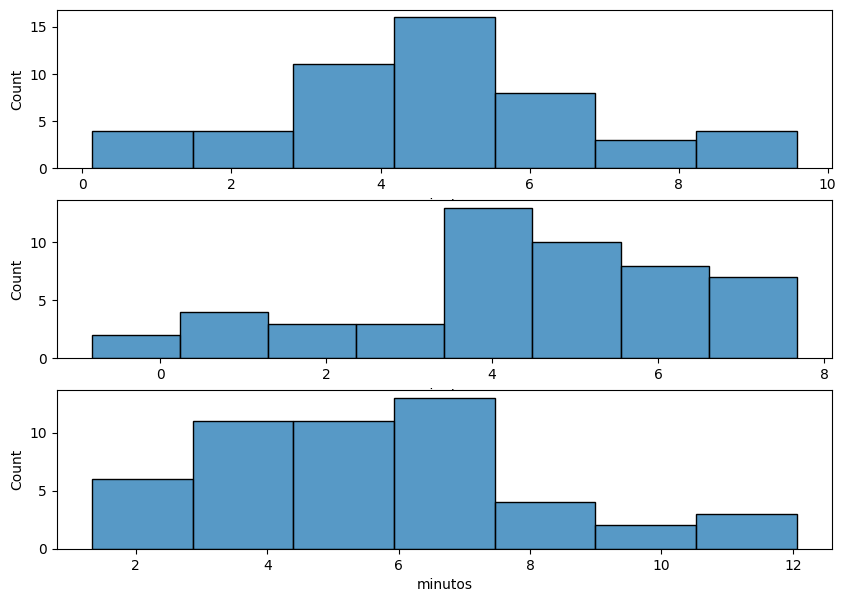

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize = (10,7))

axes = axes.flat # pasamos al 3x1

sns.histplot(x='minutos', data= df_montaje[df_montaje['metodo']=='A'], ax=axes[0])#vemos que tiene cola, por eso hacemos levene
sns.histplot(x='minutos', data= df_montaje[df_montaje['metodo']=='B'], ax=axes[1])#vemos que tiene cola, por eso hacemos levene
sns.histplot(x='minutos', data= df_montaje[df_montaje['metodo']=='C'], ax=axes[2])#vemos que tiene cola, por eso hacemos levene


In [30]:
df_montaje.groupby('metodo')['minutos'].agg(["mean", "std"])

,mean,std
metodo,,
A,4.720512,2.102454
B,4.364523,2.085242
C,5.600274,2.329937


In [ ]:
dist = np.random.normal(loc=6, scale=2, size=150)

stats.kstest(df_montaje['minutos'], dist) #el ruso #para normalidad

In [8]:
def calcular_levene(df,columna_grupos,columna_metrica): # lo mismo de abajo, pero de esta forma toma todos los valores
    unicos = df[columna_grupos].unique()
    for grupo in unicos:
        df_metrica = df[df[columna_grupos]== grupo][columna_metrica]
        globals()[grupo] = df_metrica
    print(stats.levene(*[globals()[var] for var in unicos]))
calcular_levene(df_montaje,"metodo","minutos") #homocedasticos

LeveneResult(statistic=0.5121686332045056, pvalue=0.6002599830733366)


#### Ejercicio 2: Densidad de Fluidos 


La convección es un mecanismo fundamental de transferencia de calor en fluidos, que ocurre debido a las variaciones en la densidad provocadas por diferencias de temperatura. Este fenómeno se manifiesta cuando las porciones del fluido que se calientan, al volverse menos densas, ascienden hacia regiones de menor temperatura, mientras que las porciones más frías, al ser más densas, descienden hacia las zonas donde la temperatura es más alta. Este movimiento continuo da lugar a las llamadas corrientes de convección, las cuales desempeñan un papel crucial en la distribución homogénea de la temperatura dentro del fluido, promoviendo un equilibrio térmico.

En este contexto, se ha diseñado y ejecutado un experimento con el propósito de investigar cómo se ve afectada la densidad de un fluido cuando se incrementa la temperatura en una región específica del sistema; por tanto se asegura la independencia y aleatoriedad del mismo. El objetivo del experimento es comprender en detalle las modificaciones en la densidad que resultan de este aumento térmico y cómo estas afectan el comportamiento global del fluido.


1. Analiza las suposiciones del modelo: ¿Se cumplen las condiciones de homocedasticidad, independencia y normalidad?
2. ¿Tiene la temperatura un impacto notable en la densidad del fluido?
3. ¿Es posible concluir que las temperaturas de 100 y 125 provocan, en promedio, una menor densidad en el fluido comparadas con las temperaturas de 150 y 175?

In [4]:
df_densidad = pd.read_csv('C:\\Users\\DELL\\Git\\AB_Testing\\labs\\datos\\densidad_fluidos.csv')